In [129]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install customtkinter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.1/295.1 kB 3.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#make it inetractive - https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

In [144]:
from pytrends.request import TrendReq

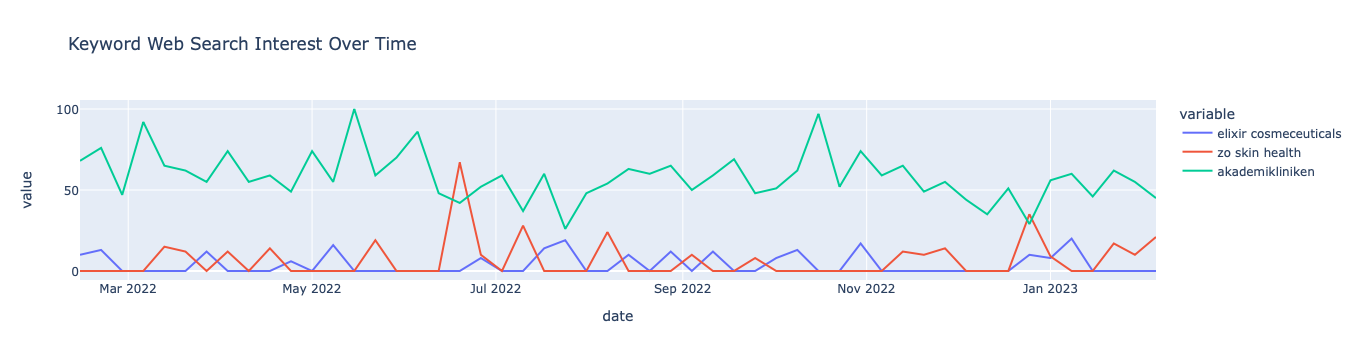

In [145]:
def interest_over_time():
    
    import plotly.express as px

    pytrends = TrendReq(hl='en-US', tz=60, geo='SE')
    kw_list = ['elixir cosmeceuticals', 'zo skin health', 'akademikliniken']
    pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')

    data = pytrends.interest_over_time() 
    data = data.reset_index() 

    fig = px.line(data, x="date", y=['elixir cosmeceuticals', 'zo skin health', 'akademikliniken'], title='Keyword Web Search Interest Over Time')
    fig.show() 

interest_over_time()

In [132]:
def data_frame():
    
    import pandas as pd
    
    pytrends = TrendReq(hl='en-US', tz=60)
    kw_list = ['elixir cosmeceuticals', 'zo skin health', 'akademikliniken']
    pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')
    
    df = pd.DataFrame(pytrends.interest_over_time()).drop(columns='isPartial')
    
    return df.head(5)

data_frame()

,elixir cosmeceuticals,zo skin health,akademikliniken
date,,,
2022-02-13,0,91,13
2022-02-20,0,85,17
2022-02-27,0,88,13
2022-03-06,0,85,19
2022-03-13,3,87,15


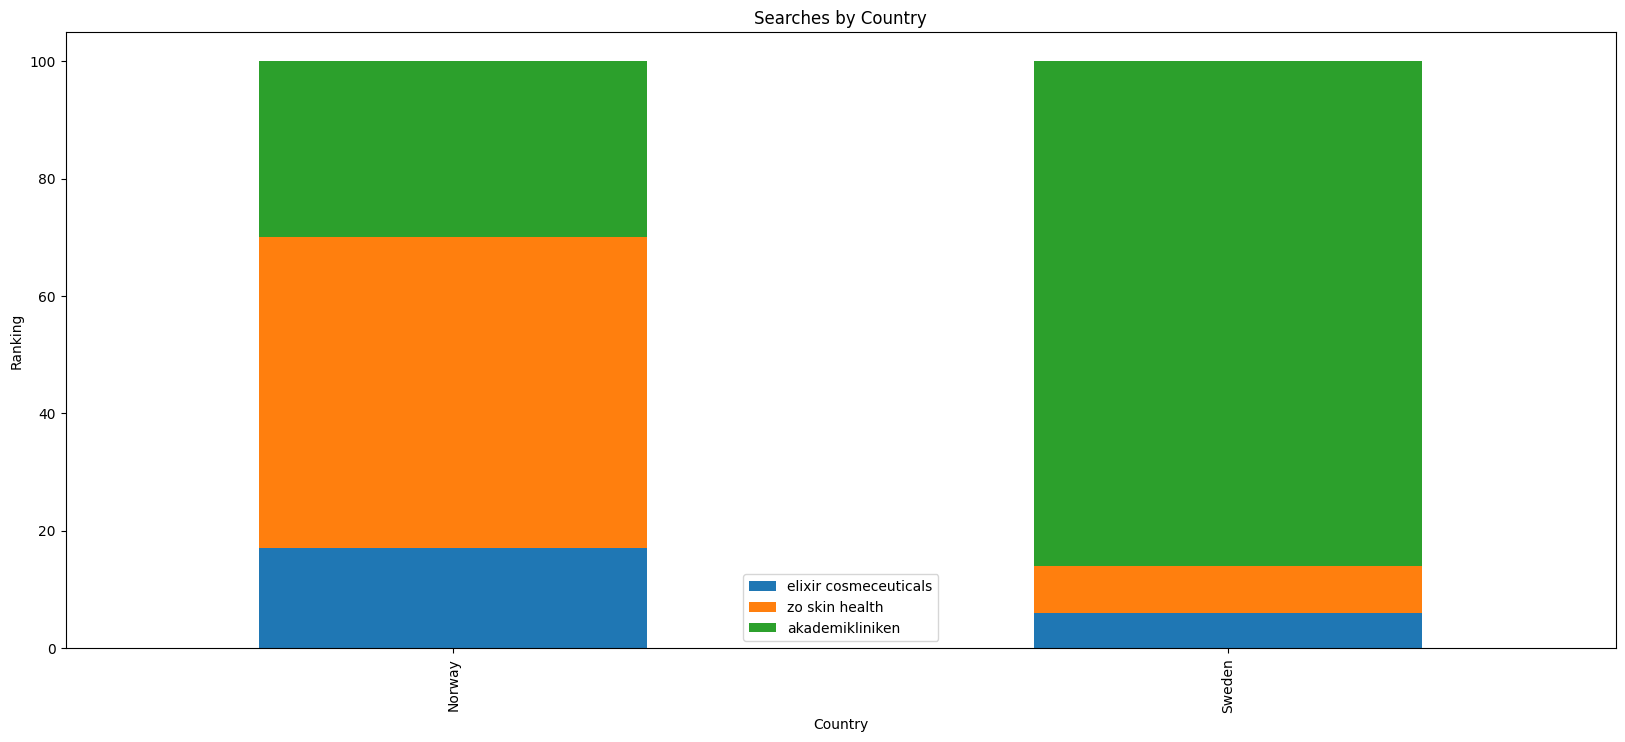

In [133]:
def interest_by_region():
    
    import matplotlib.pyplot as plt
    
    pytrends = TrendReq(hl='en-US', tz=60)
    kw_list = ['elixir cosmeceuticals', 'zo skin health', 'akademikliniken']
    pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')
    
    by_region = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
    by_region = by_region[by_region['elixir cosmeceuticals'] > 0]
    
    plot = by_region.reset_index().plot(x='geoName', y=['elixir cosmeceuticals', 'zo skin health', 'akademikliniken'], kind ='bar', stacked=True, title="Searches by Country")

    plt.rcParams["figure.figsize"] = [20, 8]
    plt.xlabel("Country")
    plt.ylabel("Ranking")
    plt
    
interest_by_region()

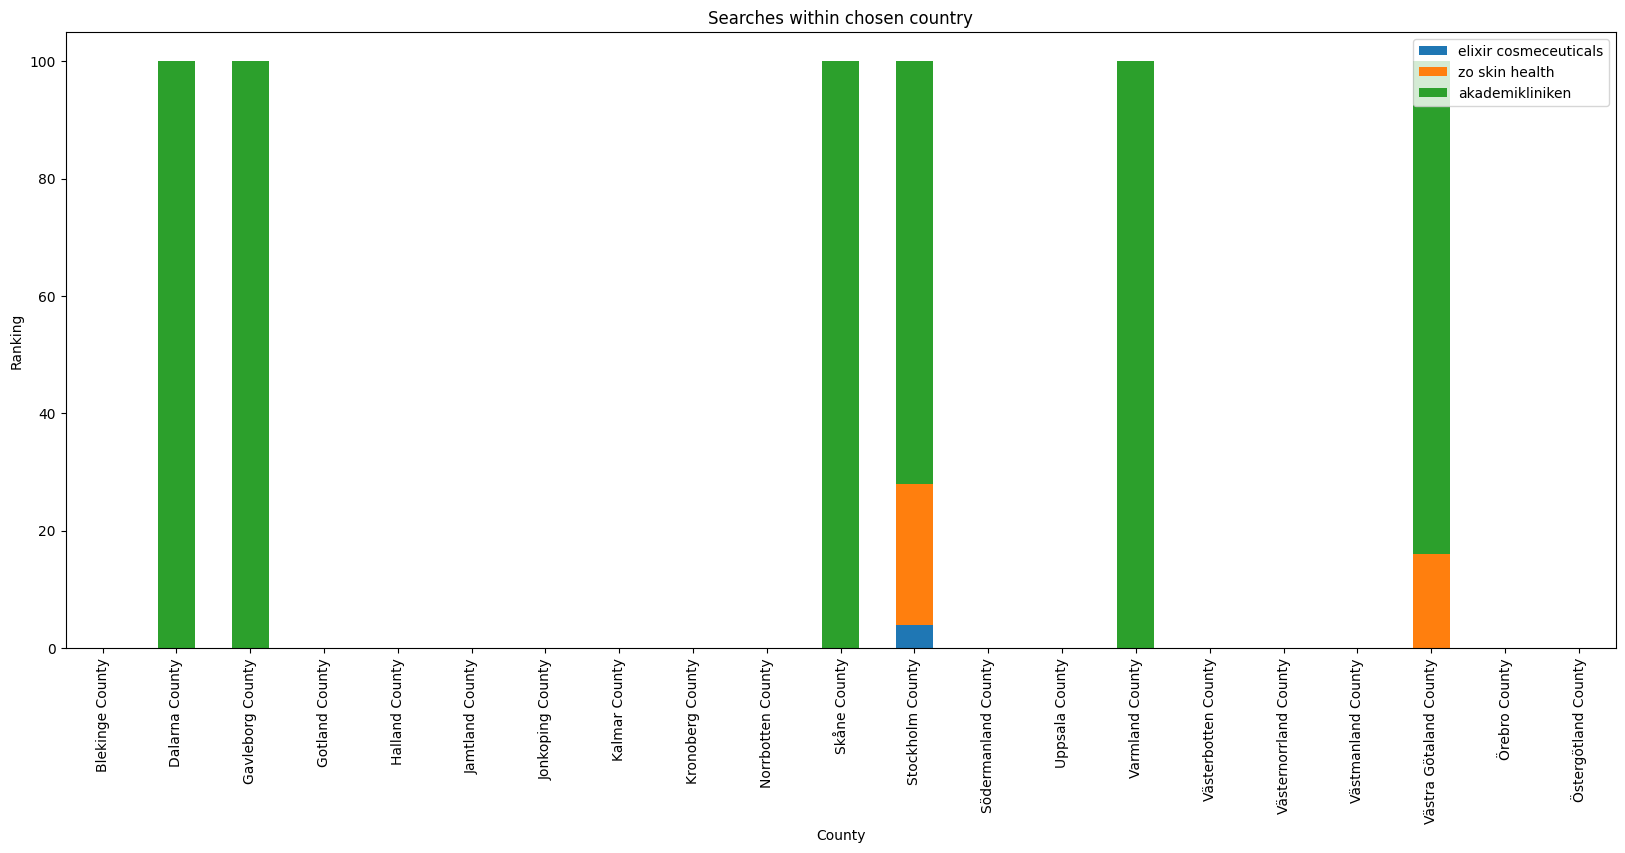

In [146]:
def interest_within_country():
    
    import matplotlib.pyplot as plt
    
    pytrends = TrendReq(hl='en-US', tz=60)
    kw_list = ['elixir cosmeceuticals', 'zo skin health', 'akademikliniken']
    pytrends.build_payload(kw_list, geo='SE', timeframe='today 1-m')
    df_ibr = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

    df_ibr.reset_index().plot(x='geoName', y=['elixir cosmeceuticals', 'zo skin health', 'akademikliniken'], kind ='bar', stacked=True, title="test")
    plt.rcParams["figure.figsize"] = [20, 8]

    plt.title("Searches within chosen country")
    plt.xlabel("County")
    plt.ylabel("Ranking")

interest_within_country()

In [135]:
def related_queries():
    
    pytrends = TrendReq(hl='en-US', tz=60)
    kw_list = ['elixir cosmeceuticals', 'zo skin health', 'akademikliniken']
    pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')
    
    data  = pytrends.related_queries()

    return data['elixir cosmeceuticals']['top'] 

related_queries()

,query,value
0,elixir cosmeceuticals niactil 4,100
